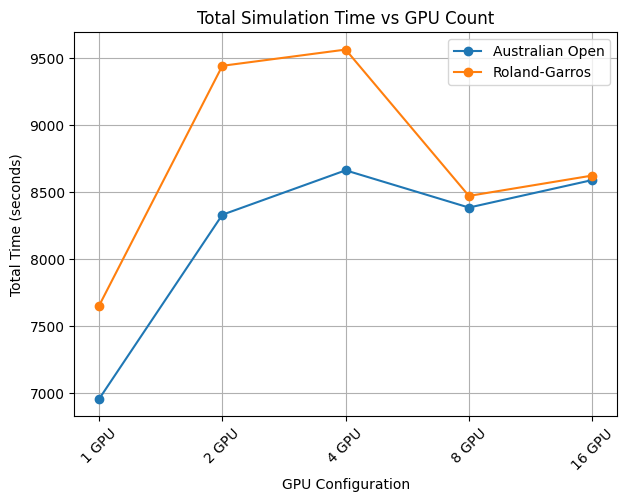

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

base_ao_dir = Path("./AUS_OPEN_2025/")
ao_paths = {
    "1 GPU": base_ao_dir / "mc_ao_results_1gpu" / "times.csv",
    "2 GPU": base_ao_dir / "mc_ao_results_2gpu" / "times.csv",
    "4 GPU": base_ao_dir / "mc_ao_results_4gpu" / "times.csv",
    "8 GPU": base_ao_dir / "mc_ao_results_8gpu" / "times.csv",
    "16 GPU": base_ao_dir / "mc_ao_results_16gpu" / "times.csv",
}

base_rg_dir = Path("./RG_2025/")
rg_paths = {
    "1 GPU": base_rg_dir / "mc_rg_results_1gpu" / "times.csv",
    "2 GPU": base_rg_dir / "mc_rg_results_2gpu" / "times.csv",
    "4 GPU": base_rg_dir / "mc_rg_results_4gpu" / "times.csv",
    "8 GPU": base_rg_dir / "mc_rg_results_8gpu" / "times.csv",
    "16 GPU": base_rg_dir / "mc_rg_results_16gpu" / "times.csv",
}

# Function to load timing data and compute total simulation time per GPU setting
def load_times(paths):
    results = []
    for label, path in paths.items():
        try:
            df = pd.read_csv(path, header=None, names=["job_index", "runs", "duration"])
            total_duration = df["duration"].sum()
            results.append((label, total_duration))
        except Exception as e:
            print(f"Failed to load {path}: {e}")
    return pd.DataFrame(results, columns=["Configuration", "Total Time (s)"])

# Load data
df_ao = load_times(ao_paths)
df_rg = load_times(rg_paths)

# Plot
fig, ax = plt.subplots()
ax.plot(df_ao["Configuration"], df_ao["Total Time (s)"], marker='o', label="Australian Open")
ax.plot(df_rg["Configuration"], df_rg["Total Time (s)"], marker='o', label="Roland-Garros")
ax.set_title("Total Simulation Time vs GPU Count")
ax.set_xlabel("GPU Configuration")
ax.set_ylabel("Total Time (seconds)")
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

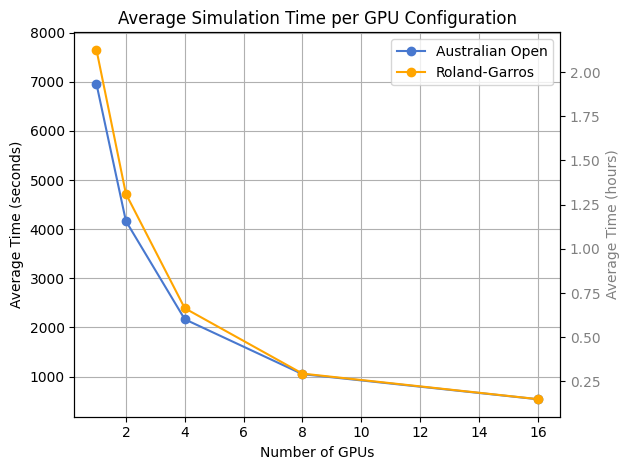

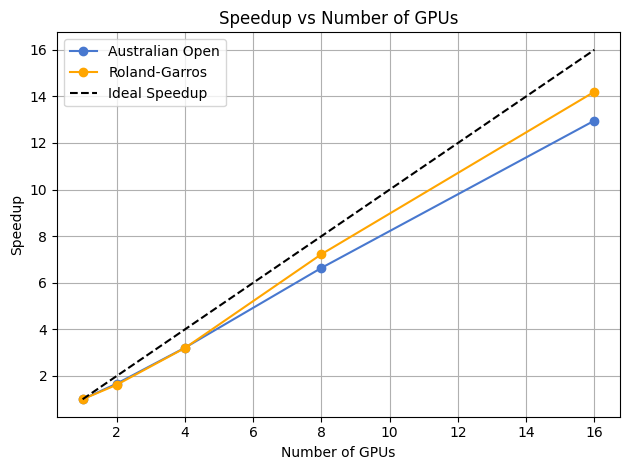

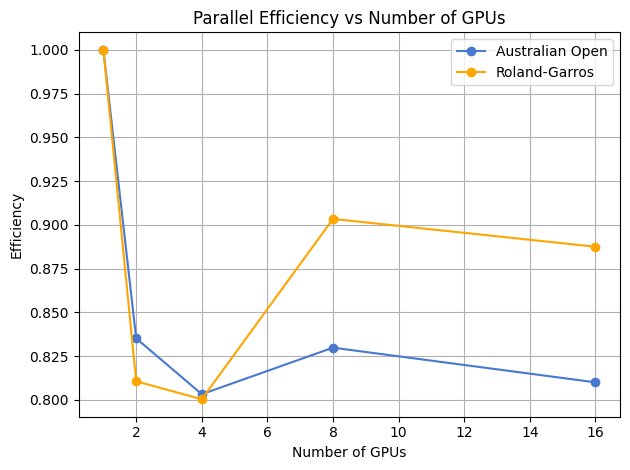

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

base_ao_dir = Path("./AUS_OPEN_2025/")
base_rg_dir = Path("./RG_2025/")

ao_paths = {
    1: base_ao_dir / "mc_ao_results_1gpu" / "times.csv",
    2: base_ao_dir / "mc_ao_results_2gpu" / "times.csv",
    4: base_ao_dir / "mc_ao_results_4gpu" / "times.csv",
    8: base_ao_dir / "mc_ao_results_8gpu" / "times.csv",
    16: base_ao_dir / "mc_ao_results_16gpu" / "times.csv",
}

rg_paths = {
    1: base_rg_dir / "mc_rg_results_1gpu" / "times.csv",
    2: base_rg_dir / "mc_rg_results_2gpu" / "times.csv",
    4: base_rg_dir / "mc_rg_results_4gpu" / "times.csv",
    8: base_rg_dir / "mc_rg_results_8gpu" / "times.csv",
    16: base_rg_dir / "mc_rg_results_16gpu" / "times.csv",
}

def load_average_times(paths):
    records = []
    for gpu, path in paths.items():
        try:
            df = pd.read_csv(path, header=None, names=["job_index", "runs", "duration"])
            avg_time = df["duration"].mean()
            records.append((gpu, avg_time))
        except Exception as e:
            print(f"Erreur de chargement {path} : {e}")
    df = pd.DataFrame(records, columns=["GPU", "AvgTime"])
    df = df.sort_values("GPU")
    df["Speedup"] = df["AvgTime"].iloc[0] / df["AvgTime"]
    df["Efficiency"] = df["Speedup"] / df["GPU"]
    return df

df_ao = load_average_times(ao_paths)
df_rg = load_average_times(rg_paths)

fig, ax1 = plt.subplots()
ax1.plot(df_ao["GPU"], df_ao["AvgTime"], marker='o', label="Australian Open")
ax1.plot(df_rg["GPU"], df_rg["AvgTime"], marker='o', color='orange', label="Roland-Garros")
ax1.set_xlabel("Number of GPUs")
ax1.set_ylabel("Average Time (seconds)", color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_title("Average Simulation Time per GPU Configuration")
ax2 = ax1.twinx()
ax2.set_ylabel("Average Time (hours)", color='gray')
ax2.set_ylim([t / 3600 for t in ax1.get_ylim()])
ax2.tick_params(axis='y', labelcolor='gray')
ax1.legend(loc='upper right')
ax1.grid(True)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots()
ax.plot(df_ao["GPU"], df_ao["Speedup"], marker='o', label="Australian Open")
ax.plot(df_rg["GPU"], df_rg["Speedup"], marker='o', color='orange', label="Roland-Garros")
ax.plot(df_ao["GPU"], df_ao["GPU"], 'k--', label="Ideal Speedup")
ax.set_title("Speedup vs Number of GPUs")
ax.set_xlabel("Number of GPUs")
ax.set_ylabel("Speedup")
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

fig, ax = plt.subplots()
ax.plot(df_ao["GPU"], df_ao["Efficiency"], marker='o', label="Australian Open")
ax.plot(df_rg["GPU"], df_rg["Efficiency"], marker='o', color='orange', label="Roland-Garros")
ax.set_title("Parallel Efficiency vs Number of GPUs")
ax.set_xlabel("Number of GPUs")
ax.set_ylabel("Efficiency")
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()
